# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

---

# (실습준비) 데이터 불러오기부터

In [2]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")

test_y = pd.read_csv("test_y.csv")


In [3]:
test_y=test_y.iloc[:1416]

In [4]:
train_y

,총생활인구수
0,27011.5749
1,27092.9997
2,27163.6615
3,27415.3211
4,28010.0031
...,...
42835,33060.4555
42836,32360.1898
42837,31417.3991
42838,30763.0563


In [5]:
test_y

,총생활인구수
0,30509.7386
1,30759.5067
2,31048.8787
3,31076.1092
4,31714.9309
...,...
1411,32453.4947
1412,32073.9265
1413,31374.2576
1414,31127.4353


In [6]:
train_x

,1d,7d,14d,28d
0,27924.7614,30178.4841,30215.7510,31535.2200
1,27887.0119,30125.2091,30197.7155,31188.9174
2,28119.0554,30247.8400,30298.9381,31240.4974
3,28317.6555,30632.8111,30619.1491,31442.4314
4,29073.9680,31085.9805,31260.2082,31922.7751
...,...,...,...,...
42835,33928.2051,33980.5909,33985.4626,34154.9696
42836,33712.5348,33047.1323,33317.9921,32915.6079
42837,32144.4917,32033.9452,31703.0691,31783.7785
42838,32137.7017,31659.1453,32302.5886,31745.4525


In [7]:
train_x = train_x.values
train_y = train_y.values


In [8]:
train_x

array([[27924.7614, 30178.4841, 30215.751 , 31535.22  ],
       [27887.0119, 30125.2091, 30197.7155, 31188.9174],
       [28119.0554, 30247.84  , 30298.9381, 31240.4974],
       ...,
       [32144.4917, 32033.9452, 31703.0691, 31783.7785],
       [32137.7017, 31659.1453, 32302.5886, 31745.4525],
       [31641.1698, 32114.6316, 31597.6085, 31856.9286]])

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

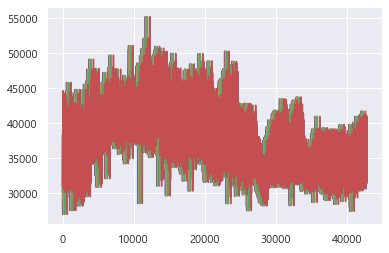

In [10]:

plt.plot(train_x)

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [11]:
# 아래에 실습코드를 작성하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [12]:
train_y[-1416:]

array([[32620.0141],
       [33003.6675],
       [33022.351 ],
       ...,
       [31417.3991],
       [30763.0563],
       [30404.274 ]])

In [13]:
# Test 데이터로 성능을 평가해보세요.

y_pred_LR = LR_reg.predict(train-마지막 1416)

print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_LR))))
print("r2 : ", r2(test_y,y_pred_LR))

LinearRegression
Mean Squared Error : 3368899.35127
Root Mean Squared Error : 1835.45617
r2 :  0.5284748373151713


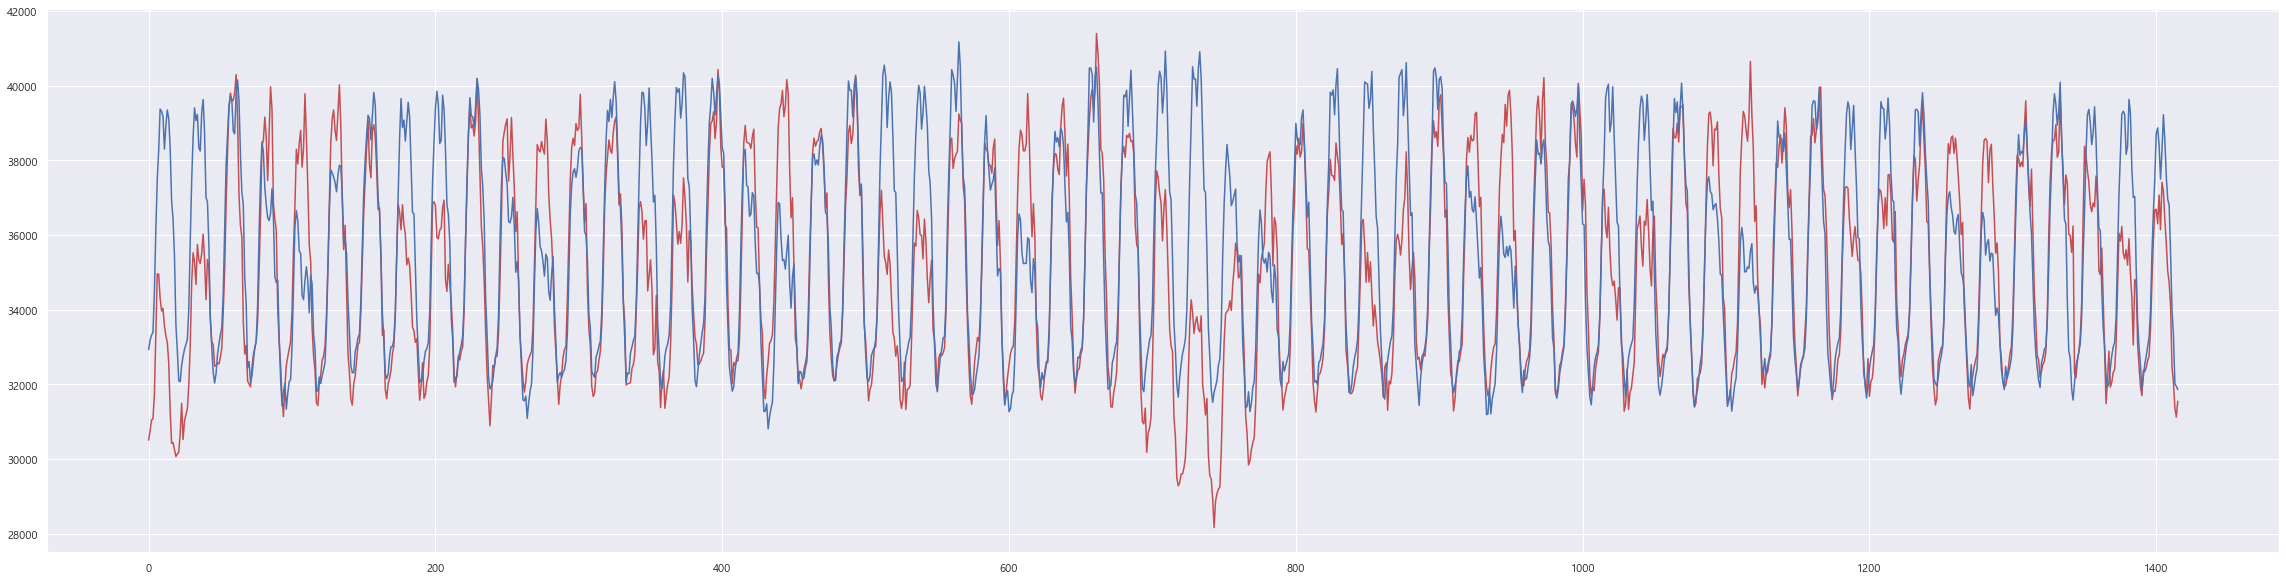

In [14]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_LR)

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [15]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import RandomForestRegressor as RFR

RFR_reg = RFR()
RFR_reg.fit(train_x, train_y)

C:\Users\PC\AppData\Local\Temp\ipykernel_5640\4150206231.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR_reg.fit(train_x, train_y)


RandomForestRegressor()

In [16]:
train_x

array([[27924.7614, 30178.4841, 30215.751 , 31535.22  ],
       [27887.0119, 30125.2091, 30197.7155, 31188.9174],
       [28119.0554, 30247.84  , 30298.9381, 31240.4974],
       ...,
       [32144.4917, 32033.9452, 31703.0691, 31783.7785],
       [32137.7017, 31659.1453, 32302.5886, 31745.4525],
       [31641.1698, 32114.6316, 31597.6085, 31856.9286]])

In [17]:
train_x[-1416:]

array([[32812.2781, 33070.6523, 32934.9892, 32711.1092],
       [33051.5752, 33311.2075, 33197.8052, 33068.2607],
       [33440.1737, 33183.0618, 33428.4441, 33123.8689],
       ...,
       [32144.4917, 32033.9452, 31703.0691, 31783.7785],
       [32137.7017, 31659.1453, 32302.5886, 31745.4525],
       [31641.1698, 32114.6316, 31597.6085, 31856.9286]])

In [18]:
# Test 데이터로 성능을 평가해보세요.

y_pred_RFR = RFR_reg.predict(train_x[-1416:])

print('RandomForestRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_RFR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_RFR))))
print("r2 : ", r2(test_y,y_pred_RFR))


RandomForestRegressor
Mean Squared Error : 3529800.85571
Root Mean Squared Error : 1878.77643
r2 :  0.5059543936478141


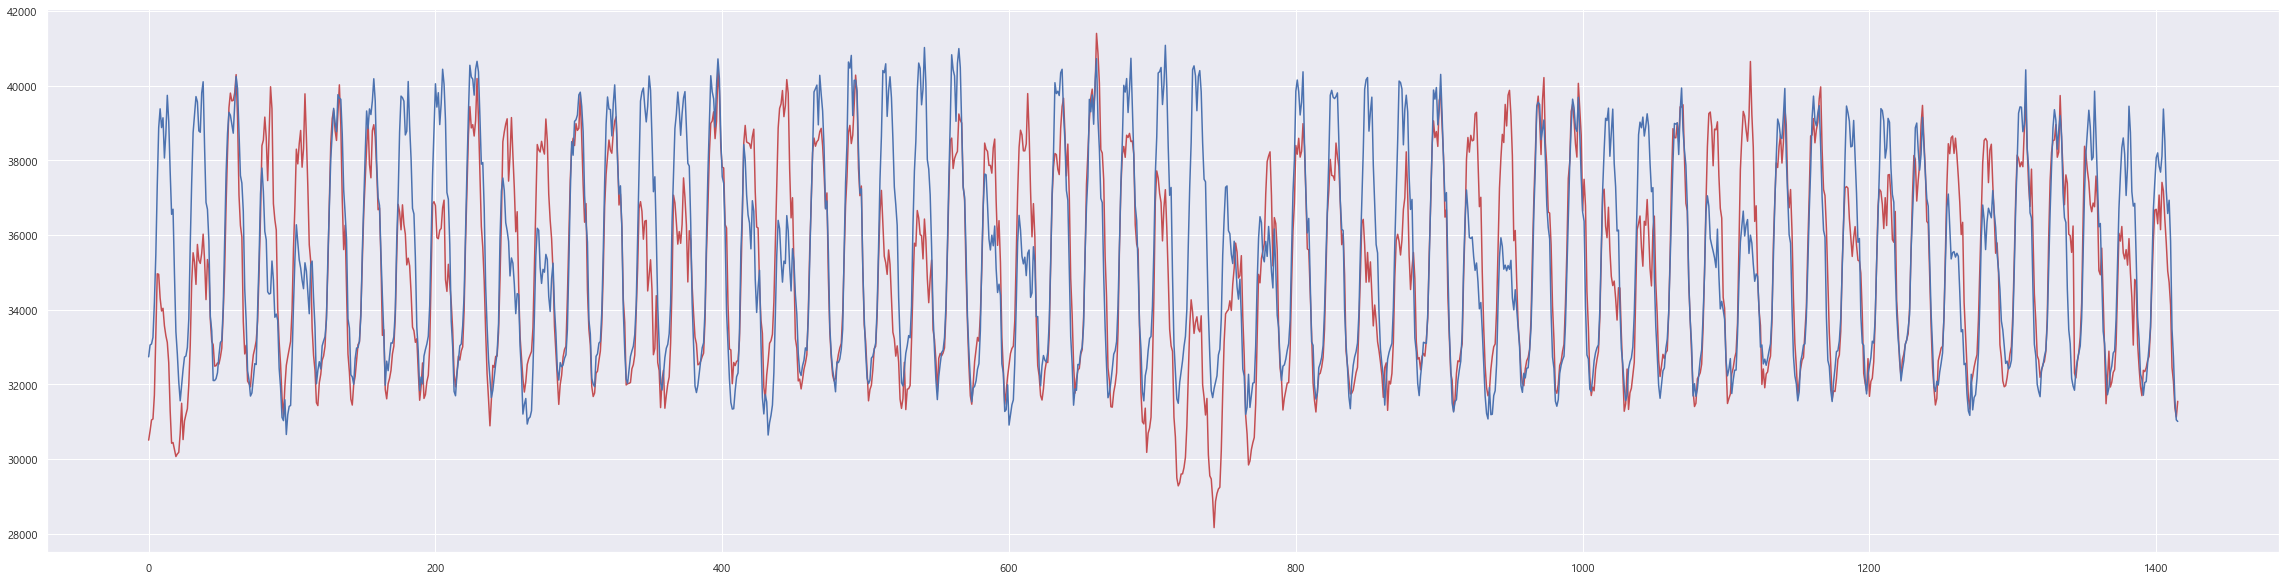

In [19]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_RFR)

In [20]:
train_x

array([[27924.7614, 30178.4841, 30215.751 , 31535.22  ],
       [27887.0119, 30125.2091, 30197.7155, 31188.9174],
       [28119.0554, 30247.84  , 30298.9381, 31240.4974],
       ...,
       [32144.4917, 32033.9452, 31703.0691, 31783.7785],
       [32137.7017, 31659.1453, 32302.5886, 31745.4525],
       [31641.1698, 32114.6316, 31597.6085, 31856.9286]])

#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [21]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
rfr_importances = RFR_reg.feature_importances_
forest_importances = pd.Series(rfr_importances, index = feature_names)
forest_importances

feature 0    0.164114
feature 1    0.755469
feature 2    0.044899
feature 3    0.035518
dtype: float64

In [22]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [23]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr_reg = GBR()
gbr_reg.fit(train_x, train_y)


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [24]:
# Test 데이터로 성능을 평가해보세요.

y_pred_gbr = gbr_reg.predict(train_x[-1416:])

print('GradientBoostingRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_gbr)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_gbr))))
print("r2 : ", r2(test_y,y_pred_gbr))

GradientBoostingRegressor
Mean Squared Error : 3237017.38949
Root Mean Squared Error : 1799.17131
r2 :  0.5469335851134209


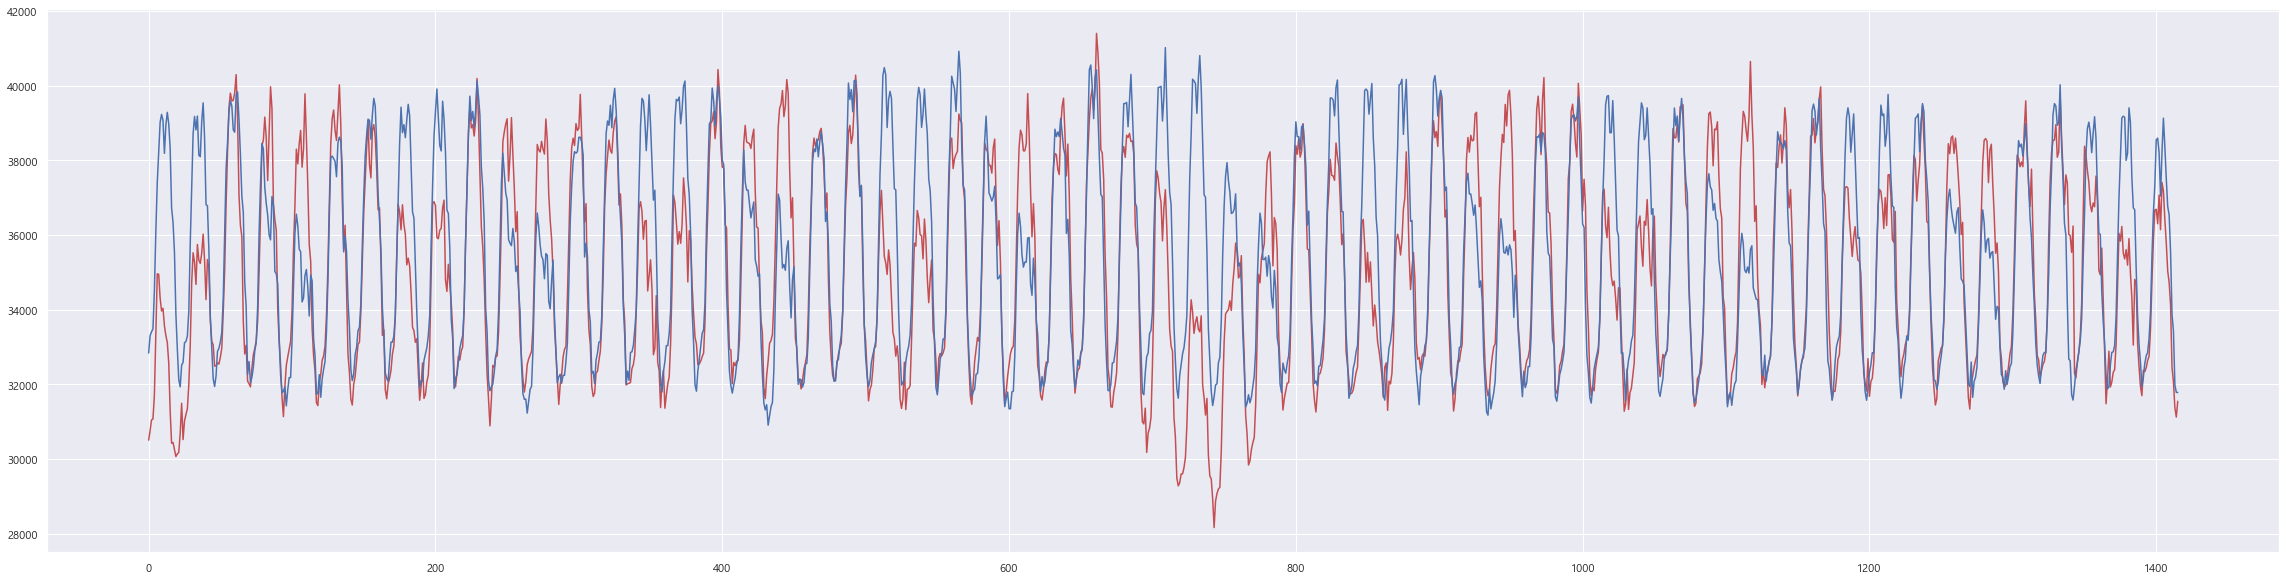

In [25]:
plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_gbr)

#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [26]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
gbr_importances = gbr_reg.feature_importances_
gradient_importances = pd.Series(gbr_importances, index = feature_names)
gradient_importances



feature 0    0.195561
feature 1    0.620939
feature 2    0.141133
feature 3    0.042367
dtype: float64

In [27]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [28]:
# 아래에 실습코드를 작성하세요.

import xgboost

xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_reg.fit(train_x, train_y)
y_pred_xgb = xgb_reg.predict(test_x)

KeyboardInterrupt: 

In [ ]:
# Test 데이터로 성능을 평가해보세요.

print('Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_xgb))))
print("r2 : ", r2(test_y,y_pred_xgb))

Xgboost
Mean Squared Error : 3394860.05316
Root Mean Squared Error : 1842.51460
r2 :  0.733572549228307


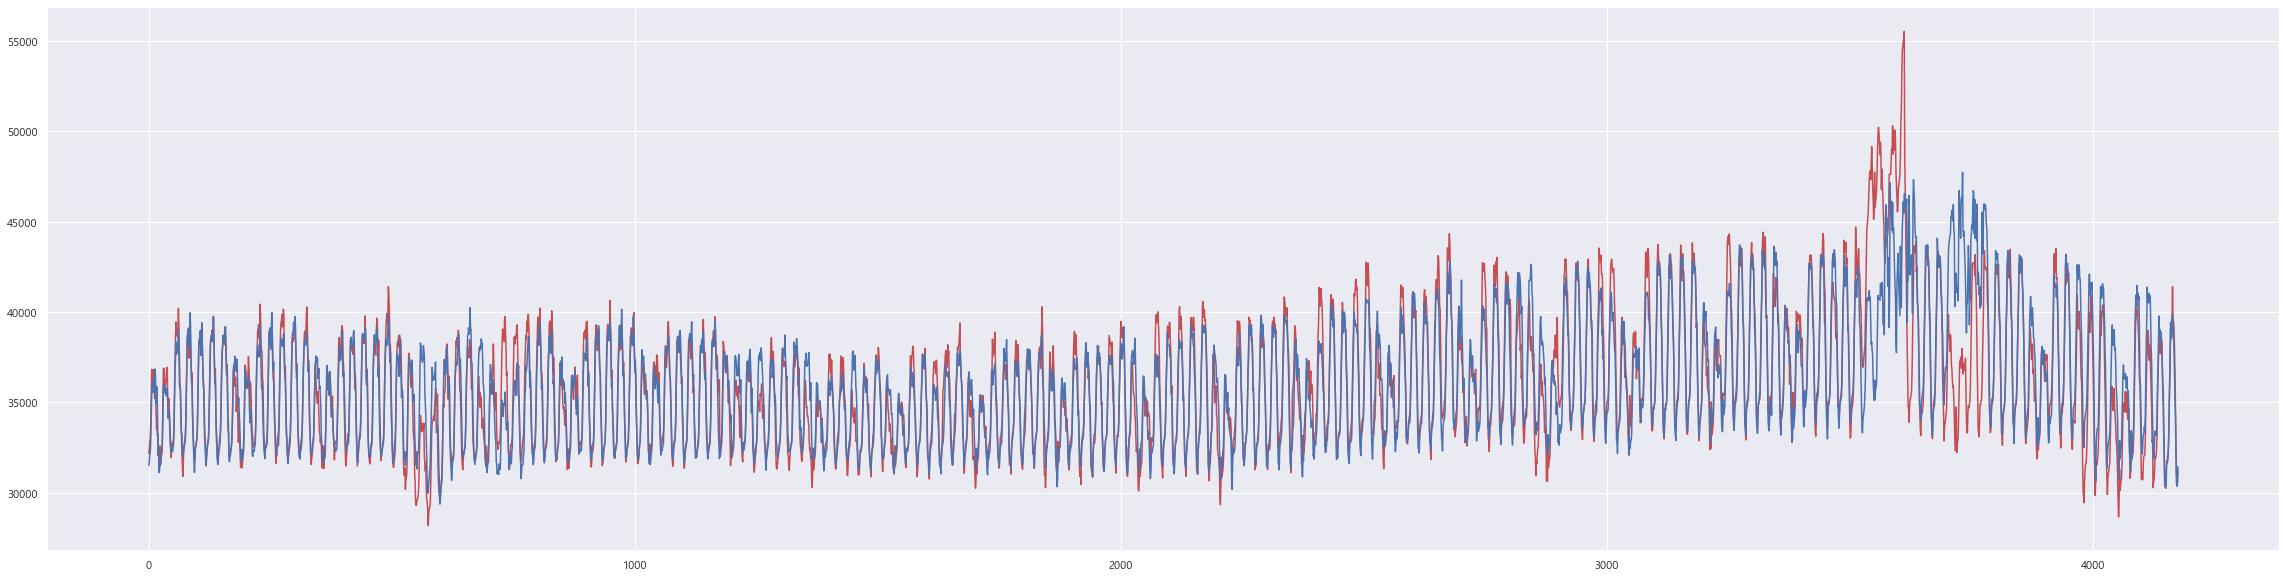

In [ ]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_xgb)

#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

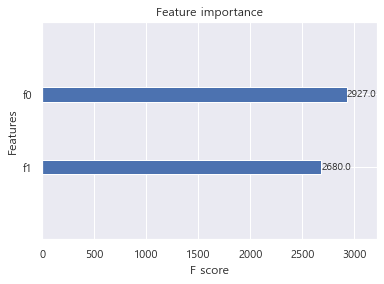

In [ ]:
# Feature의 중요도 확인

xgboost.plot_importance(xgb_reg)



In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링 test
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [ ]:
# 아래에 실습코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)

In [ ]:
scaler.fit(test_x)
scaled_test_x = scaler.transform(test_x)

In [ ]:
# 아래에 실습코드를 작성하세요.

scaled_train_x

array([[0.15538966, 0.16070305],
       [0.15600652, 0.14840061],
       [0.16122772, 0.150233  ],
       ...,
       [0.18234751, 0.17842033],
       [0.18210629, 0.16510552],
       [0.16446693, 0.18128672]])

In [ ]:
LR_reg.fit(scaled_train_x, train_y)
scaled_y_pred_LR = LR_reg.predict(scaled_test_x)

In [ ]:
print('scaled_LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_LR))))
print("r2 : ", r2(test_y,scaled_y_pred_LR))

scaled_LinearRegression
Mean Squared Error : 4062798.12746
Root Mean Squared Error : 2015.63839
r2 :  0.6811529986068101


In [ ]:
xgb_reg.fit(scaled_train_x, train_y)
scaled_y_pred_xgb = xgb_reg.predict(scaled_test_x)

In [ ]:
print('scaled_Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_xgb))))
print("r2 : ", r2(test_y,scaled_y_pred_xgb))

scaled_Xgboost
Mean Squared Error : 4103087.02674
Root Mean Squared Error : 2025.60782
r2 :  0.6779911396314153


# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝_1
* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
model1 = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),])

model1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [38]:
history1 = model1.fit(train_x, train_y, epochs= 100, validation_split=0.2)

Epoch 1/100
1071/1071 [==============================] - 1s 1ms/step - loss: 2471134.5000 - mse: 2471134.5000 - val_loss: 810036.1875 - val_mse: 810036.1875
Epoch 2/100
1071/1071 [==============================] - 1s 1ms/step - loss: 2497737.7500 - mse: 2497737.7500 - val_loss: 858227.0625 - val_mse: 858227.0625
Epoch 3/100
1071/1071 [==============================] - 1s 1ms/step - loss: 2453721.2500 - mse: 2453721.2500 - val_loss: 867571.6875 - val_mse: 867571.6875
Epoch 4/100
1071/1071 [==============================] - 1s 1ms/step - loss: 2440325.7500 - mse: 2440325.7500 - val_loss: 856682.1250 - val_mse: 856682.1250
Epoch 5/100
1071/1071 [==============================] - 1s 1ms/step - loss: 2443973.7500 - mse: 2443973.7500 - val_loss: 802405.7500 - val_mse: 802405.7500
Epoch 6/100
1071/1071 [==============================] - 1s 1ms/step - loss: 2403142.0000 - mse: 2403142.0000 - val_loss: 850435.1250 - val_mse: 850435.1250
Epoch 7/100
1071/1071 [==============================] - 1

In [45]:
y_pred_deep1 = model1.predict(train_x[-1416:])

pd.DataFrame(y_pred_deep1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1416 non-null   float32
dtypes: float32(1)
memory usage: 5.7 KB


In [42]:
print('DEEP1')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_deep1)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_deep1))))
print("r2 : ", r2(test_y,y_pred_deep1))


DEEP1
Mean Squared Error : 3787441.28850
Root Mean Squared Error : 1946.13496
r2 :  0.46989396728338595


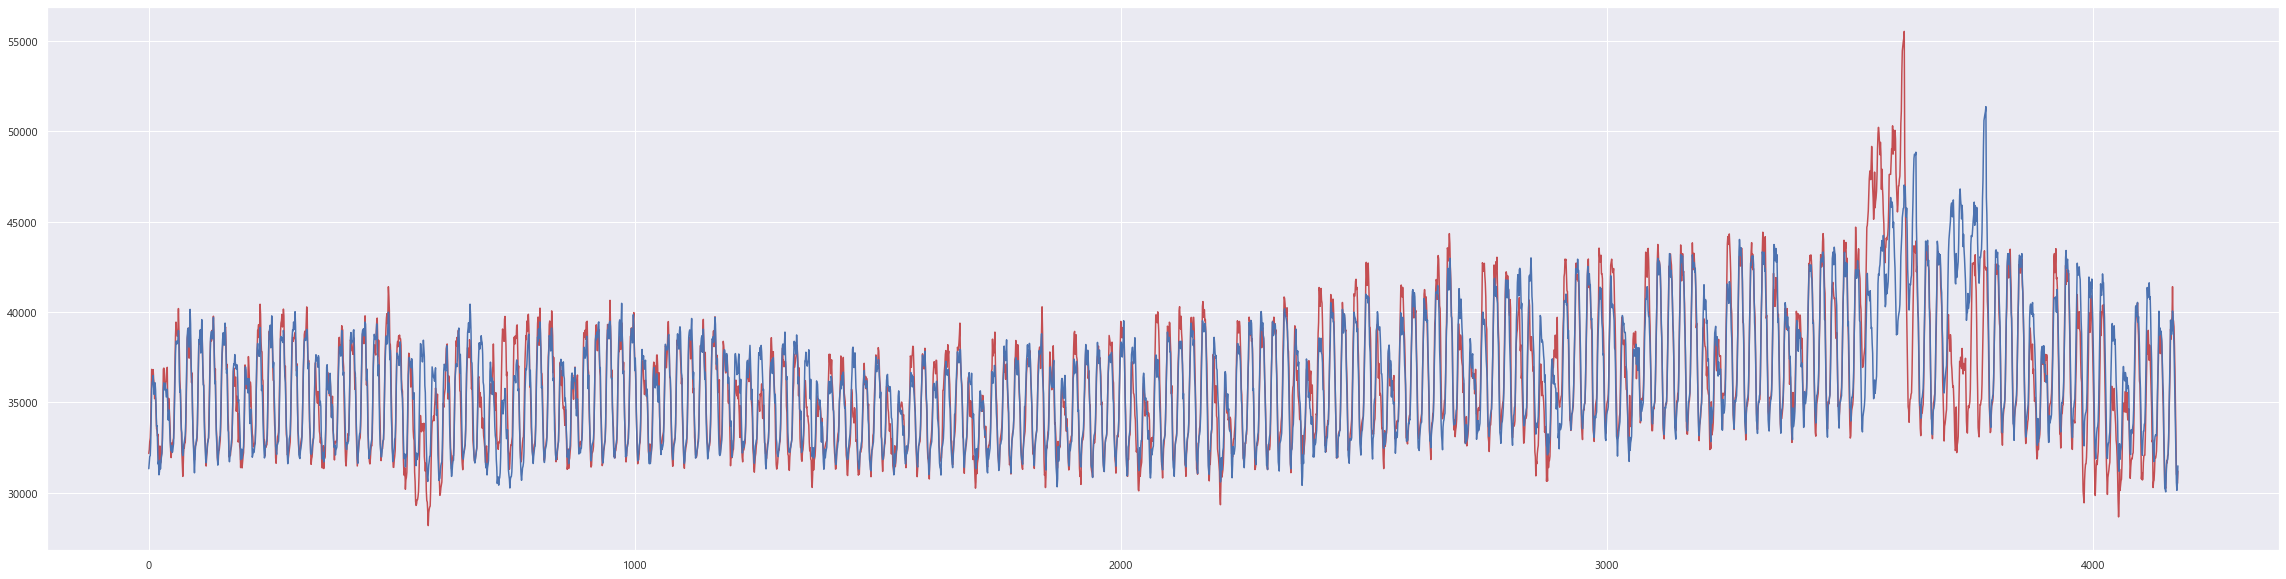

In [ ]:

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_deep1)
